<a href="https://www.kaggle.com/code/rajadurai23/chennaihousepriceprediction?scriptVersionId=162466882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Chennai House Price Prediction </h1>

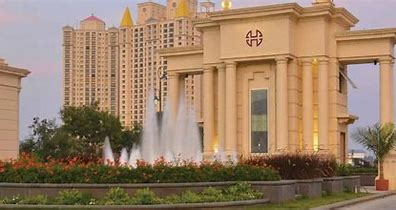

In [1]:
from IPython.display import Image
Image("/kaggle/input/chennai-image/chennai.jpeg")

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/chennai-housing-sales-price/Chennai houseing sale.csv")


In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
## Remove null values
df = df.dropna()

In [8]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


**Removing The Masked Data**

In [9]:
df = df.drop(['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

# Data Cleaning Process

In [10]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [11]:
area = {'Chrompt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet','TNagar':'T Nagar','Ana Nagar':'Anna Nagar',
        'Karapakam':'Karapakkam','Ann Nagar':'Anna Nagar','Velchery':'Velachery','KKNagar':'KK Nagar','Adyr':'Adyar','Adayar':'Adyar'}
df.AREA = df.AREA.replace(area)

In [12]:
df['Property_age'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [13]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,Property_age
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,760122,304049,21717770,11
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200,20
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,356321,77042,9630290,22
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,208767,107060,5353000,49
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,346191,205551,10818480,9
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,317354,167028,8351410,28
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,425350,119098,8507000,32


In [14]:
df.BUILDTYPE.value_counts()

BUILDTYPE
House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: count, dtype: int64

In [15]:
name = {'Comercial':'Commercial','Other':'Others'}
df['BUILDTYPE'] = df['BUILDTYPE'].replace(name)
to_replace = {'Ab Normal': 'AbNormal', 'Adj Land': 'AdjLand', 'Partiall': 'Partial','PartiaLl':'Partial'}
df['SALE_COND'].replace(to_replace, inplace=True)

/tmp/ipykernel_26/3873439459.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SALE_COND'].replace(to_replace, inplace=True)


# EDA (Exploratory Data Analysis)

Text(0, 0.5, 'Sales Price')

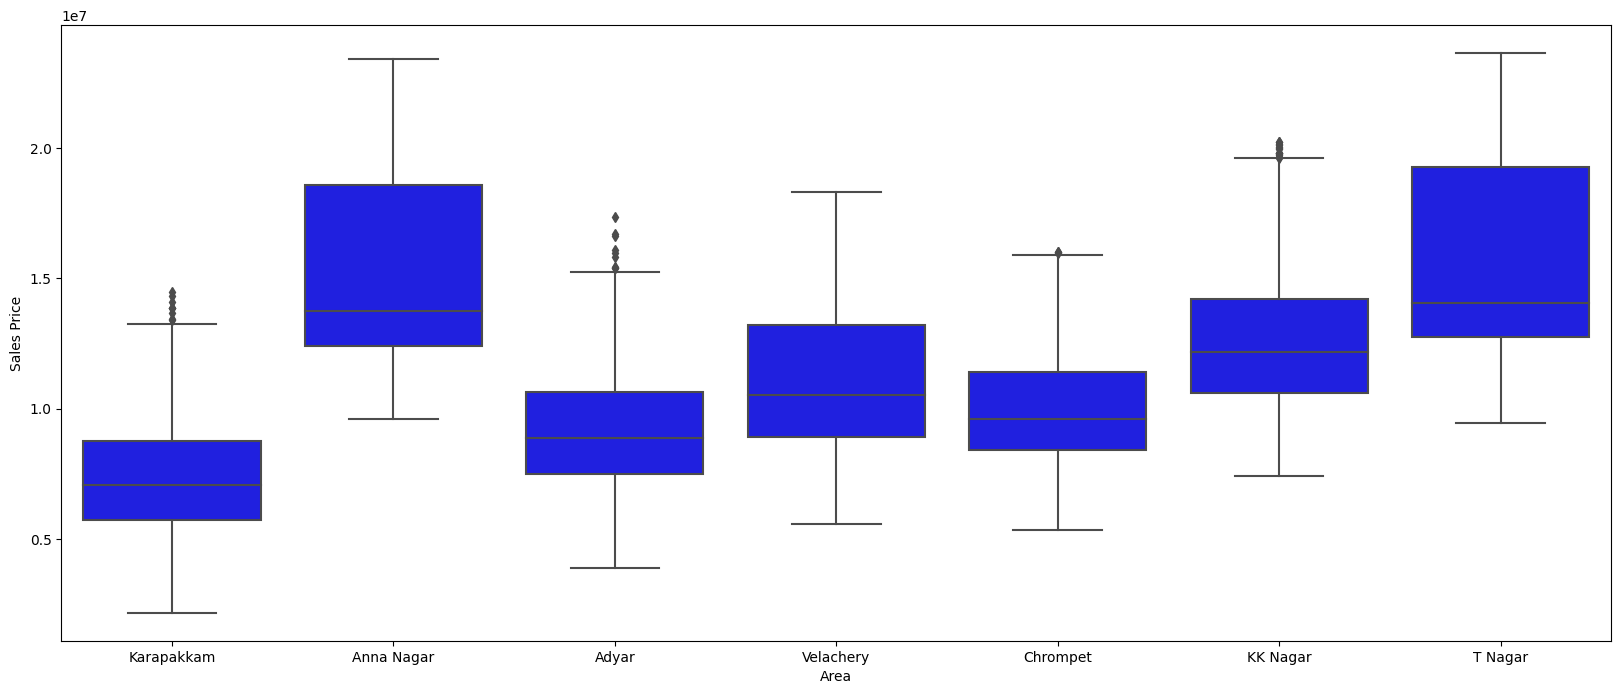

In [16]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
plt.figure(figsize=(20,8))
sns.boxplot(x = df['AREA'],y = df['SALES_PRICE'],data = df,color='blue')
plt.xlabel("Area")
plt.ylabel("Sales Price")

<p> The Sales price of houses in T Nagar is the highest </p>

<Axes: >

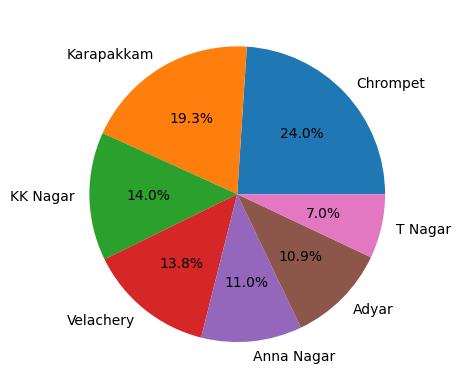

In [17]:
df['AREA'].value_counts().plot(kind='pie',ylabel='',autopct='%1.1f%%')

/tmp/ipykernel_26/2214351995.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x = "Property_age", y = "SALES_PRICE", hue="AREA", style="AREA", ci=None, linewidth=3, dashes=False).set(title='Property Sale Price Trend by Property Age & Area')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


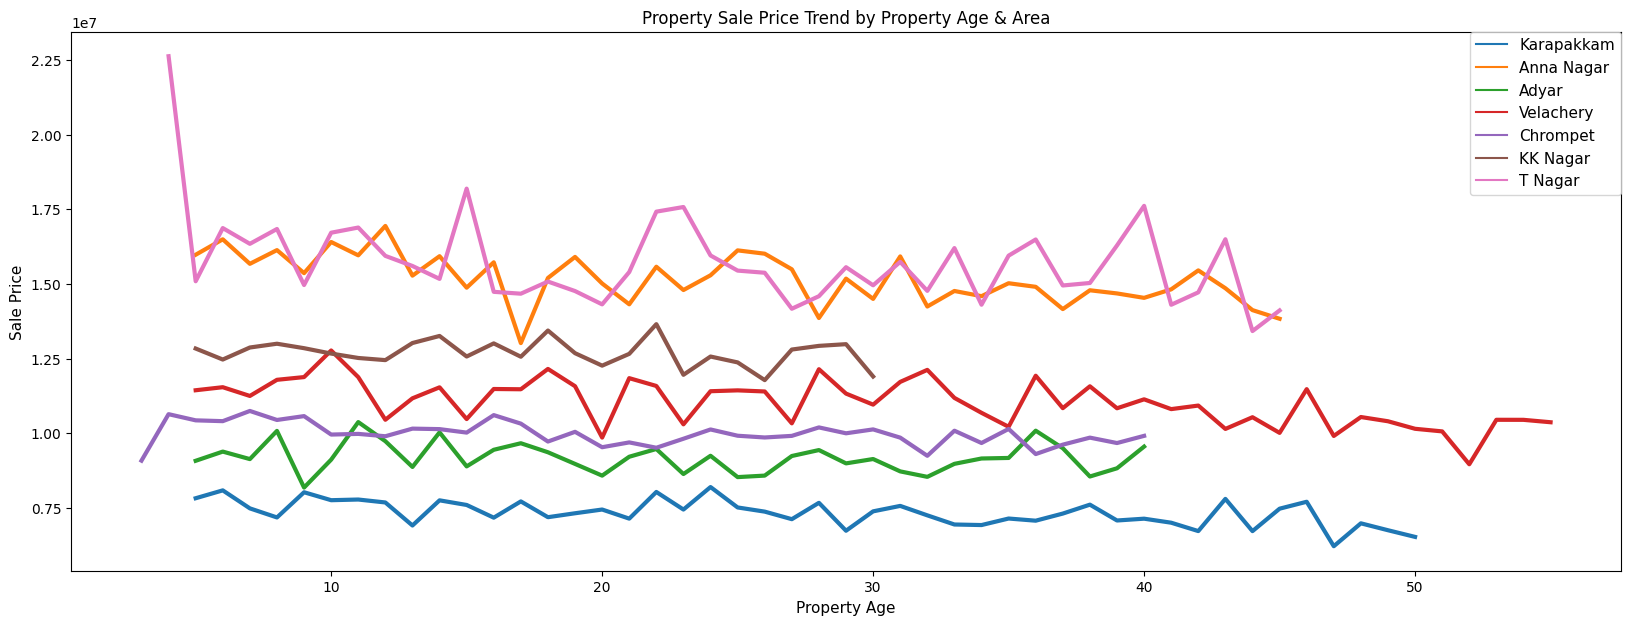

In [18]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x = "Property_age", y = "SALES_PRICE", hue="AREA", style="AREA", ci=None, linewidth=3, dashes=False).set(title='Property Sale Price Trend by Property Age & Area')
plt.legend( bbox_to_anchor=(1, 0, 0, 1),loc='best', borderaxespad=0,prop={'size':11})

plt.xlabel('Property Age', fontsize=11), plt.ylabel('Sale Price', fontsize=11)

plt.show()

The line graph provides us general view on how property age account for sales price.<br>
In places like T Nagar, we can find that as the property age decreases the sales price goes down.<br>
In general the sales prices doesn't have a steady relationship with property age.

Text(0, 0.5, 'Sales Price')

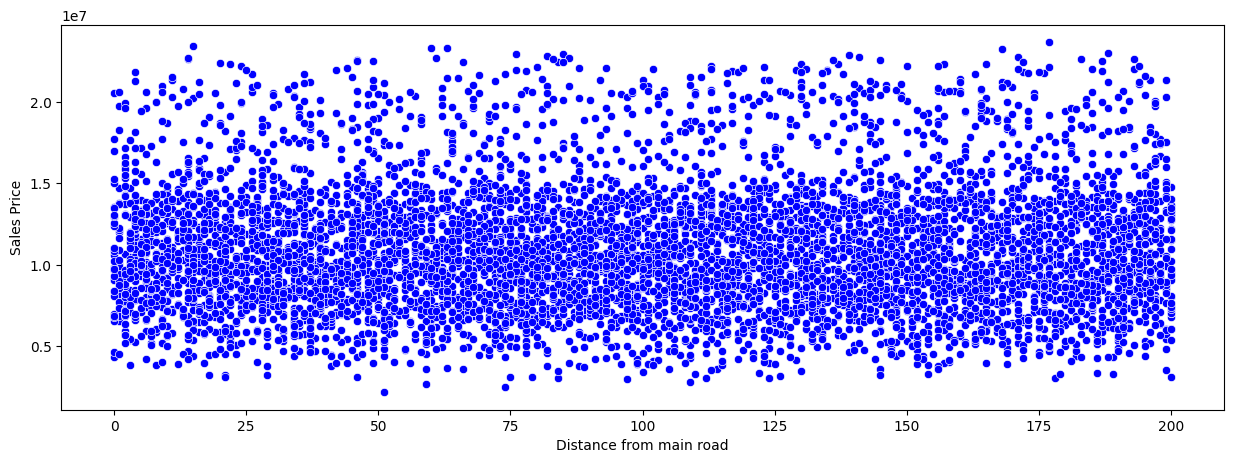

In [19]:
from matplotlib.figure import Figure
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['DIST_MAINROAD'],y = df['SALES_PRICE'],data = df,color='blue')
plt.xlabel("Distance from main road")
plt.ylabel("Sales Price")

<p>We can clearly infer from this that the distance from the main road does not affect our sales prices. </p>

<Axes: xlabel='INT_SQFT', ylabel='SALES_PRICE'>

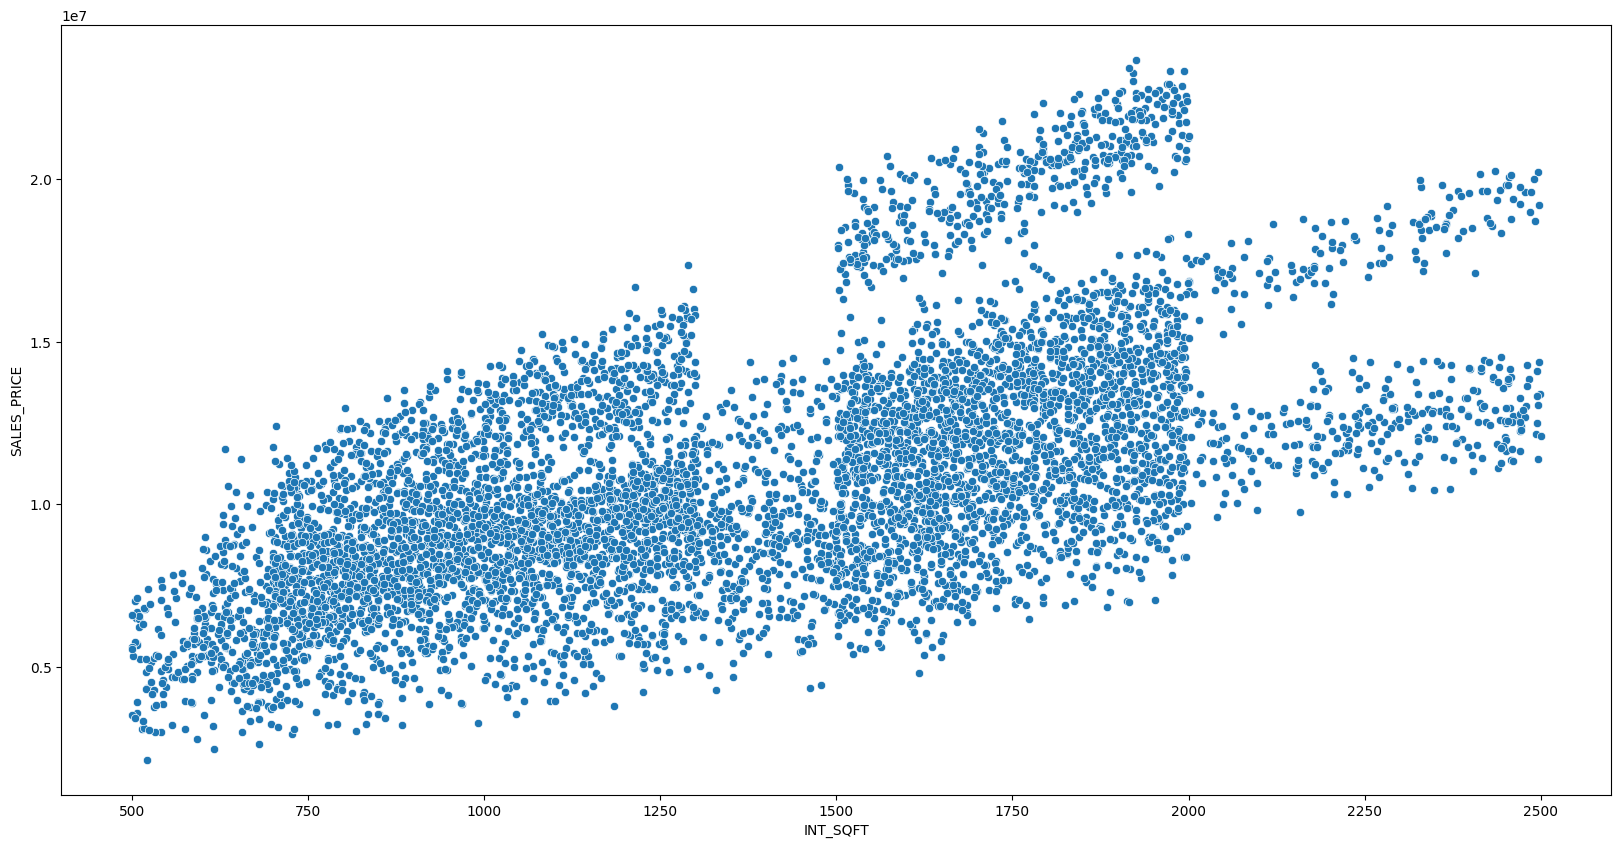

In [20]:

plt.figure(figsize=(20,10))
sns.scatterplot(x = df['INT_SQFT'],y = df['SALES_PRICE'])


<p>We can clearly infer that houses with a sqft of 2000 have the highest sales prices.</p>

Text(0, 0.5, 'Sales Price')

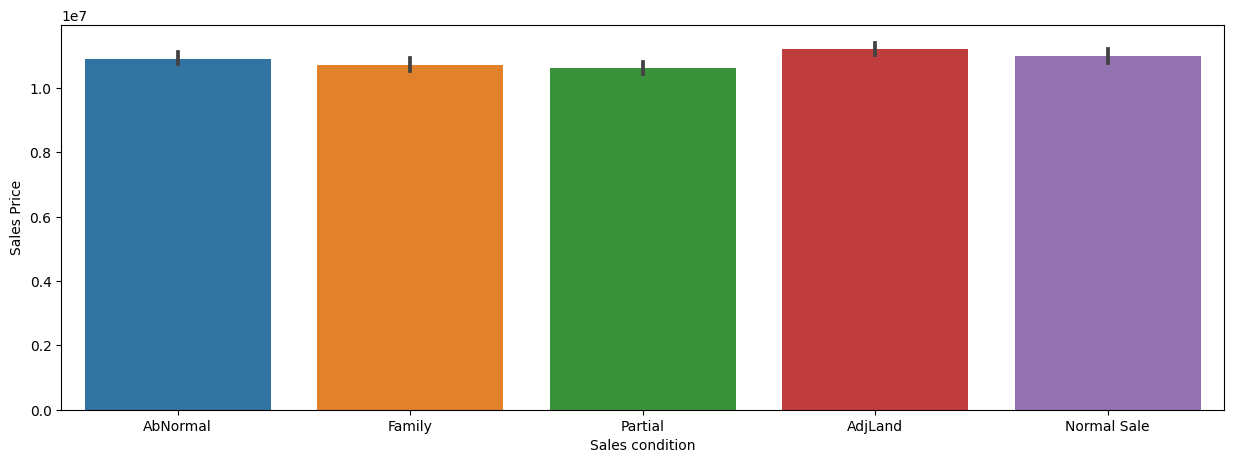

In [21]:
# import warnings
# warnings.filterwarnings('ignore')


plt.figure(figsize=(15,5))
sns.barplot(x=df['SALE_COND'],y=df['SALES_PRICE'])
plt.xlabel("Sales condition")
plt.ylabel("Sales Price")

<p>The sales condition of the houses does not affect our sales price much, we could see that family and partial sales condition houses have slightly lower sales prices. </p>

Text(0, 0.5, 'Sales price')

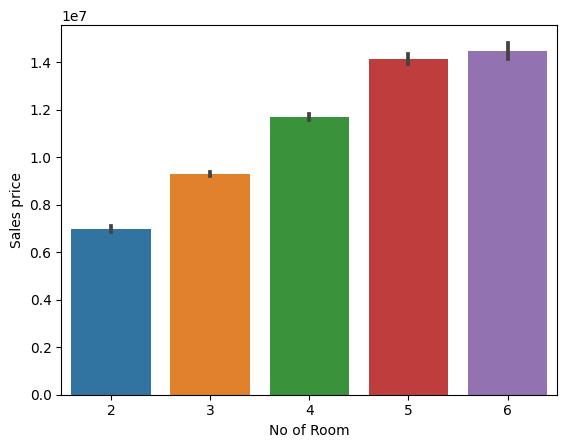

In [22]:
sns.barplot(x = df['N_ROOM'], y = df['SALES_PRICE'])
plt.xlabel("No of Room")
plt.ylabel("Sales price")

<p>Houses with 6 rooms have higher Sales Price</p>

<Axes: xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

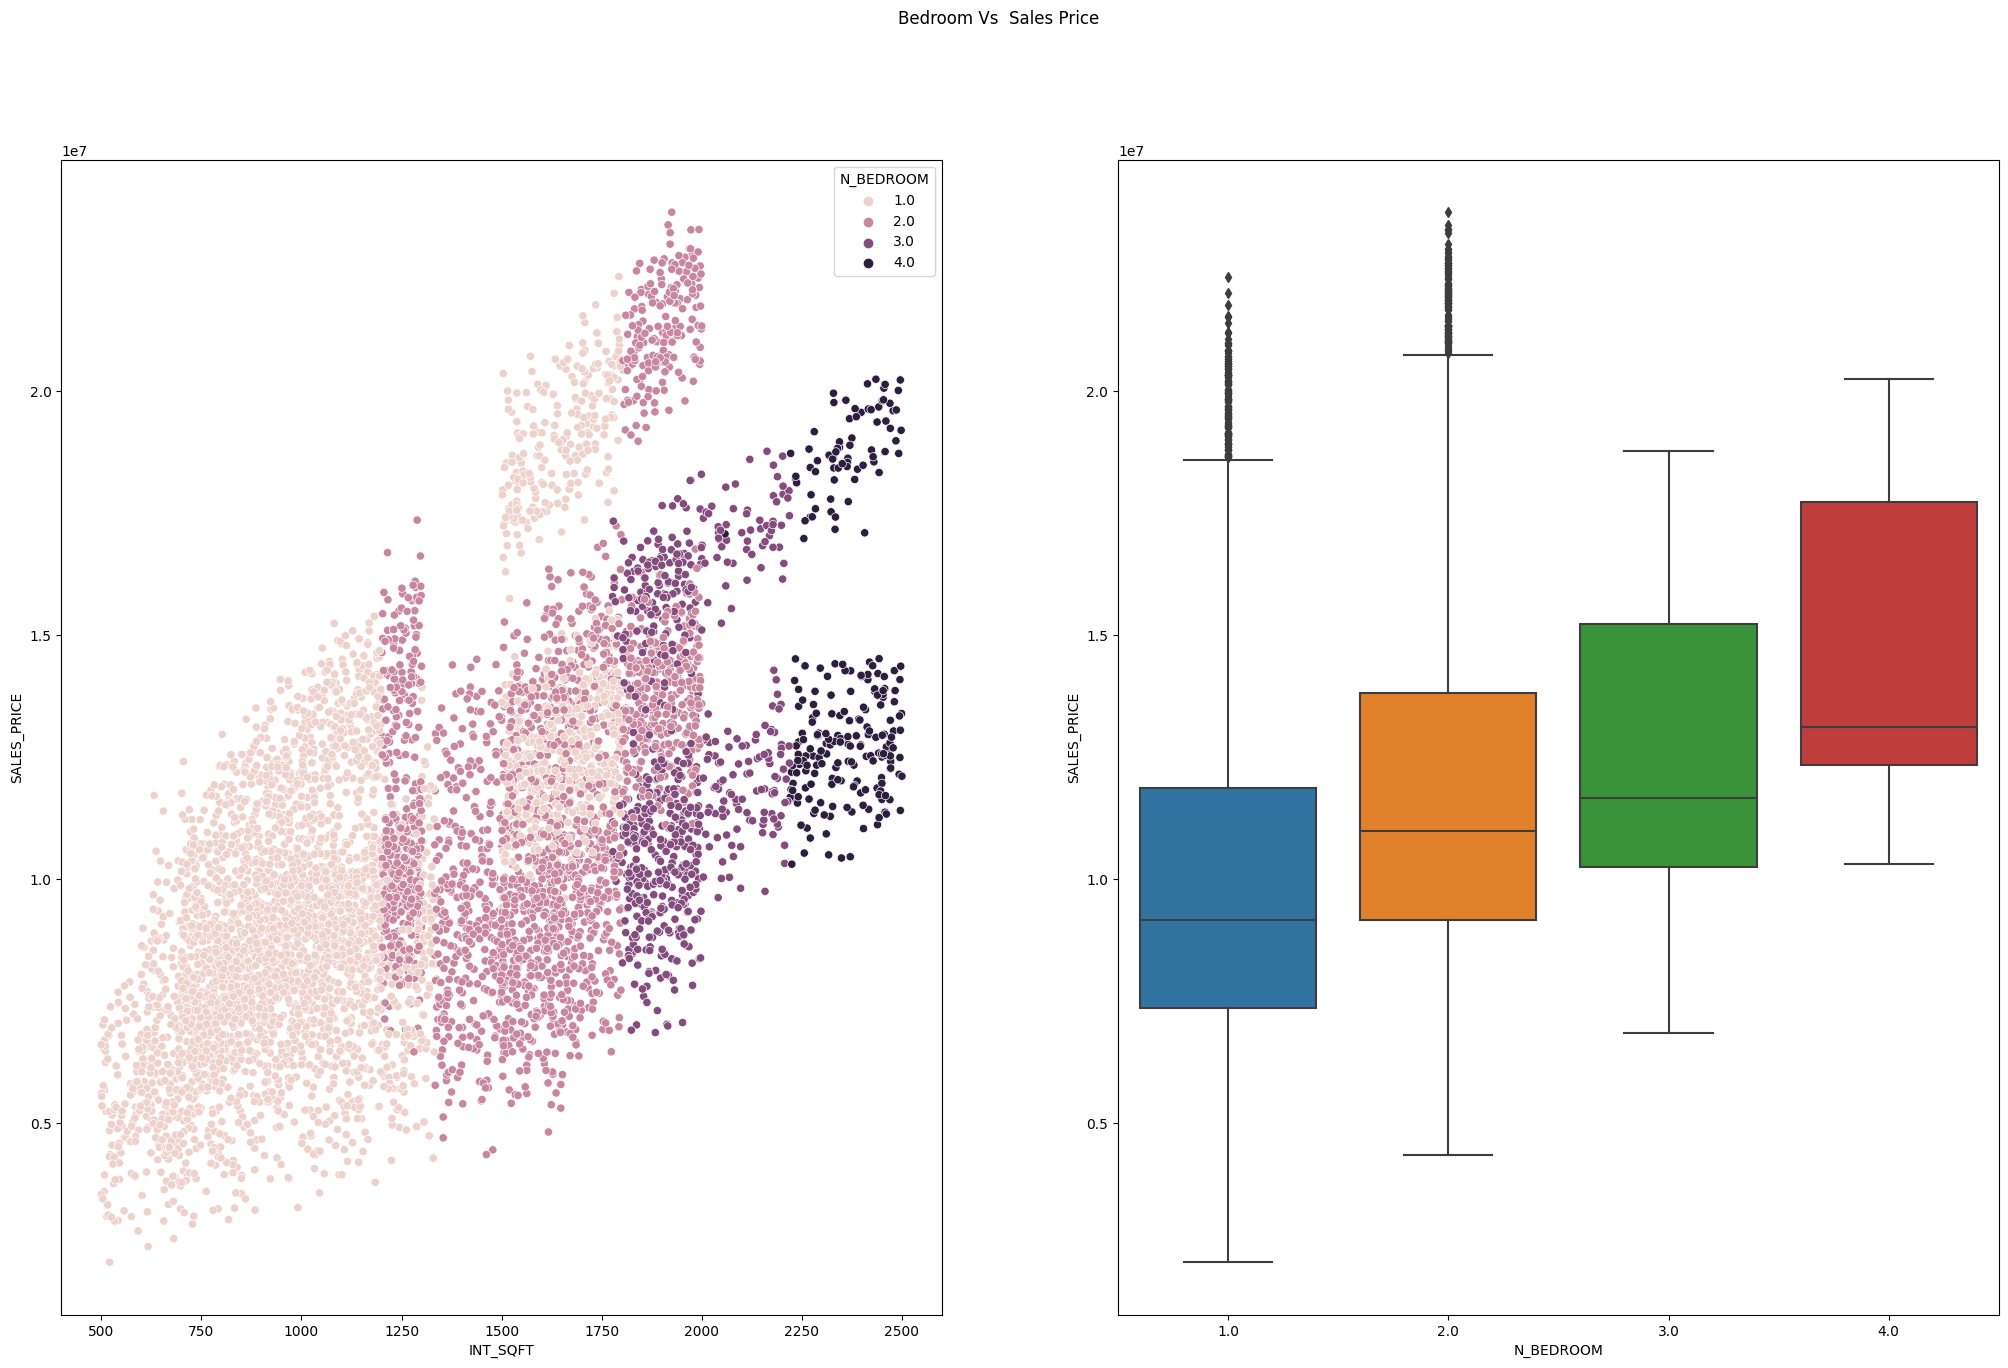

In [23]:
fig,(ax,ax1) = plt.subplots(nrows = 1,ncols = 2,figsize = (25,15))
fig.suptitle("Bedroom Vs  Sales Price")
sns.scatterplot(x=df['INT_SQFT'],y=df['SALES_PRICE'],hue='N_BEDROOM',data=df,ax=ax)
sns.boxplot(x=df['N_BEDROOM'],y=df['SALES_PRICE'],ax=ax1)

<p> 2 Bedroom houses have the highest sales price </p>

Text(0, 0.5, 'Sales Price')

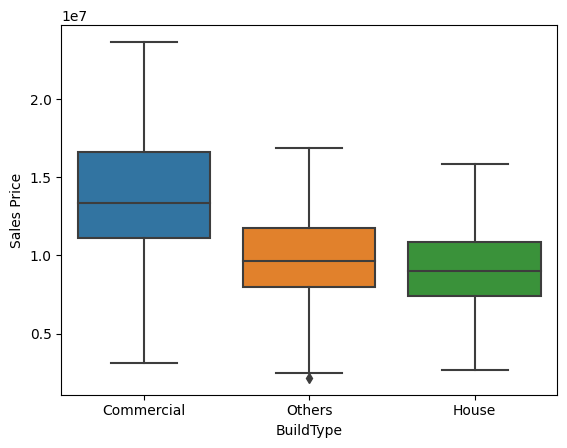

In [24]:
sns.boxplot(x = df['BUILDTYPE'],y = df['SALES_PRICE'])
plt.xlabel("BuildType")
plt.ylabel("Sales Price")


<p>Commercial Houses have the highest Sales price</p>

Text(0, 0.5, 'Sales Price')

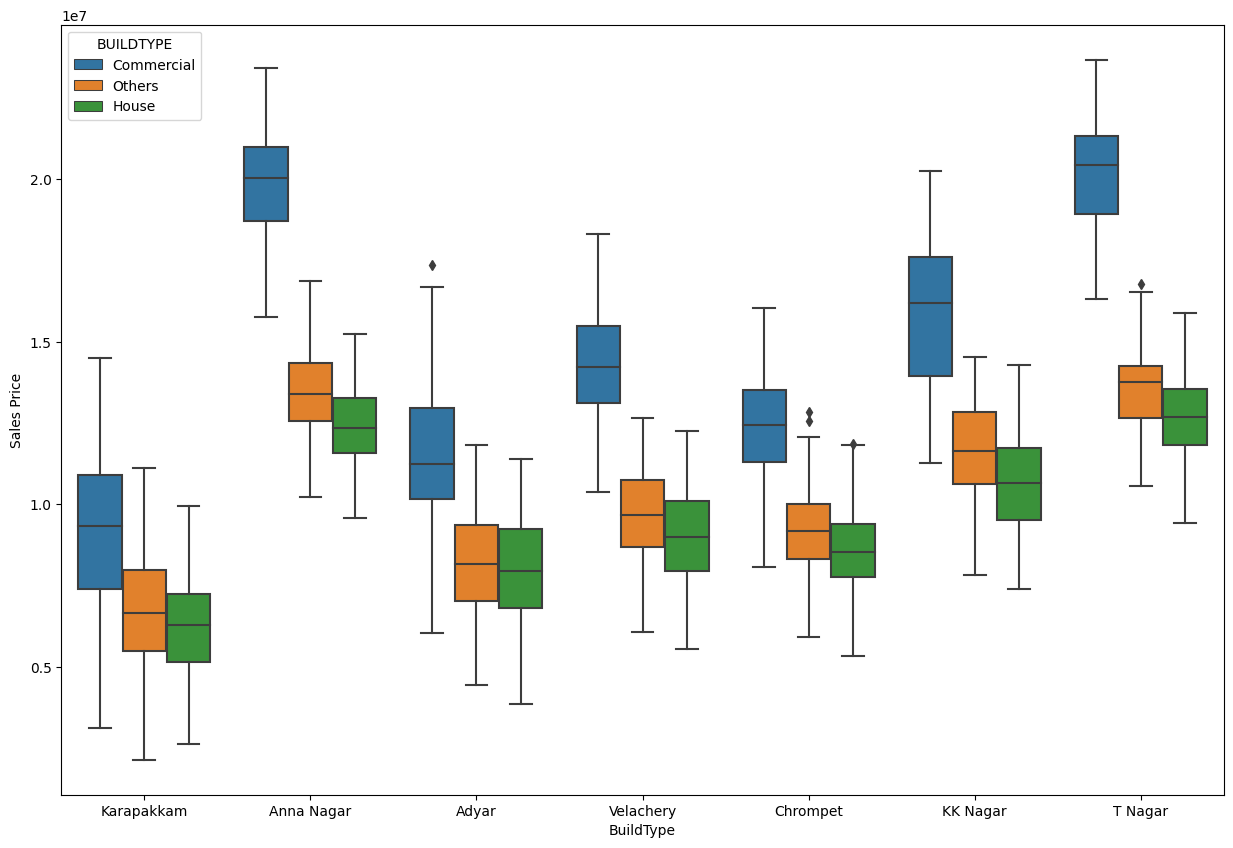

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x = df['AREA'],y = df['SALES_PRICE'],hue='BUILDTYPE',data=df)
plt.xlabel("BuildType")
plt.ylabel("Sales Price")


<p>Commercial build Houses have higher sales prices compared to others. </p>
<p>T Nagar has the highest sales price, with commercial plots accounting for the highest prices.</p>

In [26]:
df = df.drop(['PRT_ID','DATE_SALE','DIST_MAINROAD','SALE_COND','DATE_BUILD','STREET','MZZONE','STREET'],axis=1)

<p> Dropping the Columns which does not help in predicting our sales price </p>

In [27]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'BUILDTYPE', 'UTILITY_AVAIL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'Property_age'],
      dtype='object')

/tmp/ipykernel_26/3227347168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.UTILITY_AVAIL.replace(to_replace='All Pub',value='AllPub',inplace=True)


Text(0, 0.5, 'Sales price')

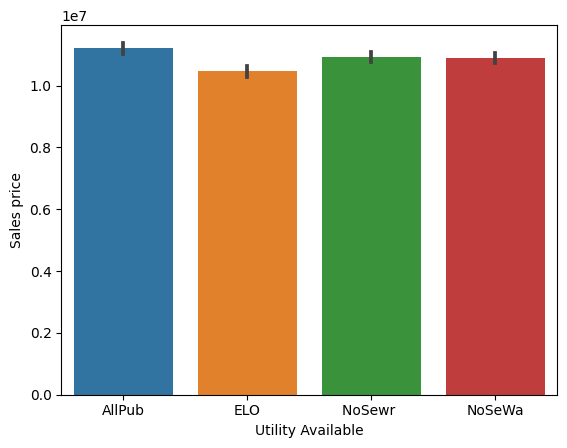

In [28]:
df.UTILITY_AVAIL.replace(to_replace='All Pub',value='AllPub',inplace=True)
sns.barplot(x = df['UTILITY_AVAIL'],y = df['SALES_PRICE'])
plt.xlabel('Utility Available')
plt.ylabel("Sales price")
#No Much difference

<p>The Sales Price is not drastically changing according to the Utility Available in that Area </p>

In [29]:
df = df.drop(['UTILITY_AVAIL'],axis=1)
value = {'Noo':'No'}
df['PARK_FACIL'] = df['PARK_FACIL'].replace(value)

<Axes: xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

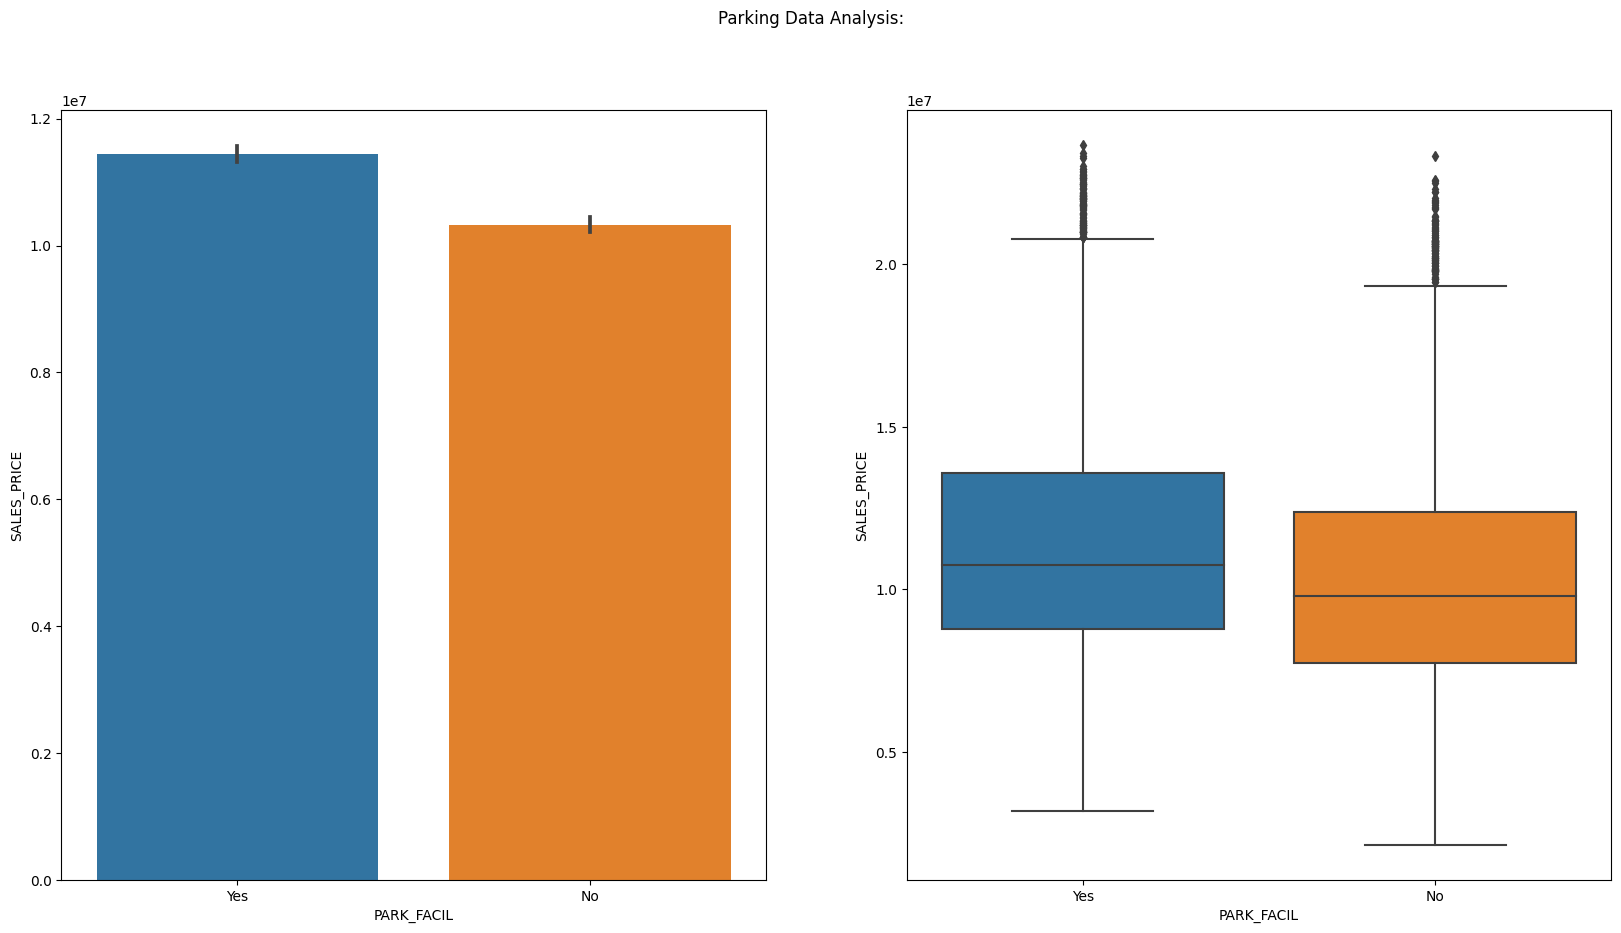

In [30]:
fig,(ax,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
fig.suptitle("Parking Data Analysis:")
sns.barplot(x=df['PARK_FACIL'],y=df['SALES_PRICE'],ax=ax)
sns.boxplot(y=df['SALES_PRICE'],x=df['PARK_FACIL'],ax=ax1)

<p> We can find that houses the parking facility have higher sales prices than houses without parking facility</p>

# Removing Outliers

<p> Formula = ( Sqft / No_of_Bedrooms ) < 400 <p>
<p> One Bedroom houses require atleast 400 sqft </p>
<p> With the above mentioned methodology we can predict which datas are outliers<p>
<p style="font-weight:bold"> Sqft --> 500 and N_Bedroom --> 2 not possible </p>

In [31]:
df[df['INT_SQFT']/df['N_BEDROOM']<400]

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,REG_FEE,COMMIS,SALES_PRICE,Property_age


**No outliers Found based on the Sqft/Bedroom method**

<h3>Detecting Outliers by Z-score based on Sales_Price </h3>
<p>House Price > Mean-3*std & House Price < Mean+3*std </p>
  

In [32]:
#Outlier based on Sales Price
def outlier(df):
    new = pd.DataFrame()
    
    for key,subdf in df.groupby('AREA'):
        mean = subdf['SALES_PRICE'].mean()
        std = subdf['SALES_PRICE'].std()
        out = subdf[(subdf['SALES_PRICE']>mean-3*std) & (subdf['SALES_PRICE']<mean+3*std)]
        new = pd.concat([new,out],ignore_index=True)
    return new  

new_df = outlier(df)
new_df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,REG_FEE,COMMIS,SALES_PRICE,Property_age
0,Adyar,909,1.0,1.0,3,Yes,Commercial,421094,92114,13159200,20
1,Adyar,1056,1.0,1.0,3,Yes,Others,319141,37546,9386490,26
2,Adyar,1136,1.0,1.0,3,Yes,Others,323214,49725,8287550,30
3,Adyar,1130,1.0,1.0,3,Yes,Commercial,468417,53533,13383350,30
4,Adyar,730,1.0,1.0,2,Yes,House,265449,53090,8848285,39
...,...,...,...,...,...,...,...,...,...,...,...
7045,Velachery,1907,3.0,2.0,5,No,Commercial,420760,210380,14025340,22
7046,Velachery,1941,3.0,2.0,5,Yes,House,320289,141304,9420260,47
7047,Velachery,1897,3.0,2.0,5,Yes,Others,346191,205551,10818480,9
7048,Velachery,1614,2.0,1.0,4,No,House,317354,167028,8351410,28


**Let us evaluate our dataset with(df) and without outliers(new_df)**

In [33]:
df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE,Property_age
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056.000000
mean,1381.316752,1.636621,1.213152,3.686650,376791.852608,140994.273384,1.088801e+07,24.273526
std,457.860850,0.803633,0.409563,1.020011,143109.581793,78774.465963,3.769081e+06,12.331565
min,500.000000,1.000000,1.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000
25%,991.000000,1.000000,1.000000,3.000000,272117.500000,84212.750000,8.266790e+06,14.000000
50%,1369.500000,1.000000,1.000000,4.000000,349444.500000,127640.500000,1.031922e+07,23.000000
75%,1744.000000,2.000000,1.000000,4.000000,451030.500000,184449.000000,1.298148e+07,34.000000
max,2500.000000,4.000000,2.000000,6.000000,983922.000000,495405.000000,2.366734e+07,55.000000


In [34]:
new_df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE,Property_age
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7.050000e+03,7050.000000
mean,1381.271489,1.636312,1.212482,3.686383,376622.544823,140923.366525,1.088400e+07,24.279433
std,458.026264,0.803905,0.409093,1.020404,143048.959746,78760.073601,3.767985e+06,12.330988
min,500.000000,1.000000,1.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000
25%,991.000000,1.000000,1.000000,3.000000,272074.750000,84171.500000,8.264120e+06,14.000000
50%,1369.500000,1.000000,1.000000,4.000000,349221.500000,127595.500000,1.031454e+07,23.000000
75%,1744.000000,2.000000,1.000000,4.000000,450881.250000,184243.000000,1.297046e+07,34.000000
max,2500.000000,4.000000,2.000000,6.000000,983922.000000,495405.000000,2.366734e+07,55.000000


**As we can clearly see the new_df (without outliers dataset) does not have much difference with the df(outlier dataset), so we can safely ignore the outliers and we can continue using our df dataset.**

**Note:** This six points may contain some useful Information, Incase if these 6 points affected our mean and standard deviation at higher level then we could have used new_df dataframe.
Remember, removing the outliers depends on the problem you are tackling, and no of outliers present, in some cases outliers may inlude some important information.

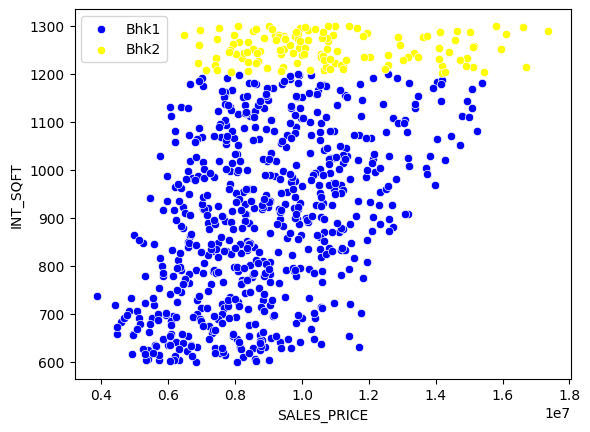

In [35]:
def price_difference(location):
    bhk1 = df[(df['AREA']== location) & (df['N_BEDROOM']==1)]
    bhk2 = df[(df['AREA']== location) & (df['N_BEDROOM']==2)]
    sns.scatterplot(x = bhk1['SALES_PRICE'],y = bhk1['INT_SQFT'],color='blue')
    sns.scatterplot(x = bhk2['SALES_PRICE'],y = bhk2['INT_SQFT'],color='yellow')
    plt.legend(labels=['Bhk1','Bhk2'])

price_difference("Adyar")

<p> From this we can clearly see that in Area Adyar prices of 2 Bedroom Houses is higher </p>

<p> We compare the same mentioned in KK Nagar Area </p>

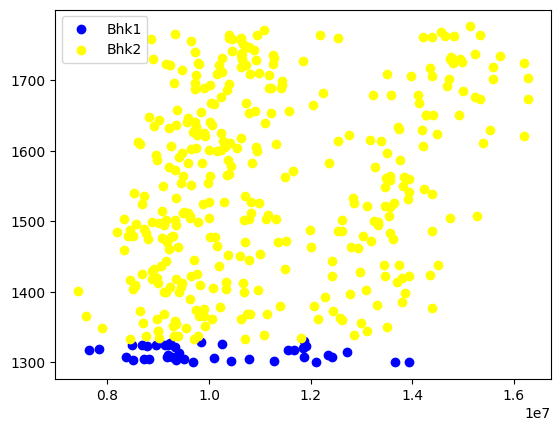

In [36]:
def price_difference(location):
    bhk1 = df[(df['AREA']== location) & (df['N_BEDROOM']==1)]
    bhk2 = df[(df['AREA']== location) & (df['N_BEDROOM']==2)]
    plt.scatter(bhk1['SALES_PRICE'],bhk1['INT_SQFT'],color='blue')
    plt.scatter(bhk2['SALES_PRICE'],bhk2['INT_SQFT'],color='yellow')
    plt.legend(labels=['Bhk1','Bhk2'])

price_difference("KK Nagar")

In [37]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,REG_FEE,COMMIS,SALES_PRICE,Property_age
0,Karapakkam,1004,1,1,3,Yes,Commercial,380000,144400,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,760122,304049,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,421094,92114,13159200,20
3,Velachery,1855,3,2,5,No,Others,356321,77042,9630290,22
4,Karapakkam,1226,1,1,3,Yes,Others,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,No,Others,208767,107060,5353000,49
7105,Velachery,1897,3,2,5,Yes,Others,346191,205551,10818480,9
7106,Velachery,1614,2,1,4,No,House,317354,167028,8351410,28
7107,Karapakkam,787,1,1,2,Yes,Commercial,425350,119098,8507000,32


<Axes: >

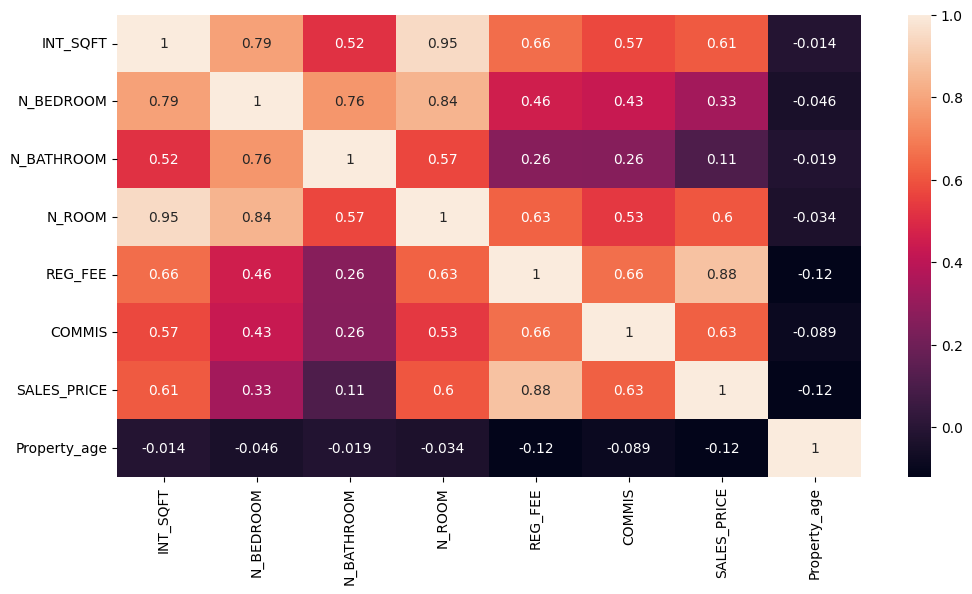

In [38]:
plt.figure(figsize=(12,6))
import seaborn as sn
sn.heatmap(df.corr(numeric_only = True),annot=True)

In [39]:
df.AREA.value_counts()

AREA
Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: count, dtype: int64

<h3> Using pd.get_dummies to convert the areas to numerical values </h3>

In [40]:
#Convert into numeric values
new = pd.DataFrame()
new = pd.get_dummies(df['AREA'],dtype=int)
new1 = pd.get_dummies(df['BUILDTYPE'],dtype=int)
new = pd.concat([new,new1],axis=1)

In [41]:
new

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,Commercial,House,Others
0,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7104,0,0,0,0,1,0,0,0,0,1
7105,0,0,0,0,0,0,1,0,0,1
7106,0,0,0,0,0,0,1,0,1,0
7107,0,0,0,0,1,0,0,1,0,0


In [42]:
df_merged = pd.concat([new,df.drop(['AREA','BUILDTYPE'],axis=1)],axis=1)

In [43]:
df_merged

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,Commercial,House,Others,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,REG_FEE,COMMIS,SALES_PRICE,Property_age
0,0,0,0,0,1,0,0,1,0,0,1004,1,1,3,Yes,380000,144400,7600000,44
1,0,1,0,0,0,0,0,1,0,0,1986,2,1,5,No,760122,304049,21717770,11
2,1,0,0,0,0,0,0,1,0,0,909,1,1,3,Yes,421094,92114,13159200,20
3,0,0,0,0,0,0,1,0,0,1,1855,3,2,5,No,356321,77042,9630290,22
4,0,0,0,0,1,0,0,0,0,1,1226,1,1,3,Yes,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,0,0,0,1,0,0,0,0,1,598,1,1,2,No,208767,107060,5353000,49
7105,0,0,0,0,0,0,1,0,0,1,1897,3,2,5,Yes,346191,205551,10818480,9
7106,0,0,0,0,0,0,1,0,1,0,1614,2,1,4,No,317354,167028,8351410,28
7107,0,0,0,0,1,0,0,1,0,0,787,1,1,2,Yes,425350,119098,8507000,32


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_merged['PARK_FACIL'] = le.fit_transform(df['PARK_FACIL'])
df_merged

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,Commercial,House,Others,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,REG_FEE,COMMIS,SALES_PRICE,Property_age
0,0,0,0,0,1,0,0,1,0,0,1004,1,1,3,1,380000,144400,7600000,44
1,0,1,0,0,0,0,0,1,0,0,1986,2,1,5,0,760122,304049,21717770,11
2,1,0,0,0,0,0,0,1,0,0,909,1,1,3,1,421094,92114,13159200,20
3,0,0,0,0,0,0,1,0,0,1,1855,3,2,5,0,356321,77042,9630290,22
4,0,0,0,0,1,0,0,0,0,1,1226,1,1,3,1,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,0,0,0,1,0,0,0,0,1,598,1,1,2,0,208767,107060,5353000,49
7105,0,0,0,0,0,0,1,0,0,1,1897,3,2,5,1,346191,205551,10818480,9
7106,0,0,0,0,0,0,1,0,1,0,1614,2,1,4,0,317354,167028,8351410,28
7107,0,0,0,0,1,0,0,1,0,0,787,1,1,2,1,425350,119098,8507000,32


In [45]:
df_merged.shape

(7056, 19)

<h3>Scaling the Numeric Values</h3>

In [46]:
input = df_merged.drop(['SALES_PRICE'],axis=1)
output = df[['SALES_PRICE']]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
input['COMMIS'] = mms.fit_transform(input[['COMMIS']])
input['REG_FEE'] = mms.fit_transform(input[['REG_FEE']])

In [47]:
import sys
!{sys.executable} -m pip install xgboost

In [48]:
commis = MinMaxScaler()
commis.fit(df[['COMMIS']])
commis

MinMaxScaler()

In [49]:
reg_fee = MinMaxScaler()
reg_fee.fit(df[['REG_FEE']])
reg_fee

MinMaxScaler()

In [50]:
sales_price = MinMaxScaler()
sales_price.fit(output[['SALES_PRICE']])
sales_price

MinMaxScaler()

In [51]:
output['SALES_PRICE'] = mms.fit_transform(output[['SALES_PRICE']])

/tmp/ipykernel_26/4255143351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['SALES_PRICE'] = mms.fit_transform(output[['SALES_PRICE']])


In [52]:
output

,SALES_PRICE
0,0.253045
1,0.909366
2,0.511487
3,0.347432
4,0.244038
...,...
7104,0.148585
7105,0.402669
7106,0.287978
7107,0.295211


# Model Selection

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from time import time
rf = RandomForestRegressor()

We will be trying these models
* Linear Regression
* XGBoost
* RandomForest Regressor
* ExtraTree Regressor

**Train Test Split**

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2,shuffle=10)

In [55]:
x_train

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,Commercial,House,Others,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,REG_FEE,COMMIS,Property_age
3109,0,0,0,0,1,0,0,1,0,0,1188,1,1,3,0,0.280371,0.370858,35
918,0,1,0,0,0,0,0,1,0,0,1712,1,1,4,0,0.684728,0.699551,35
4344,0,1,0,0,0,0,0,1,0,0,1761,1,1,4,1,0.697468,0.329322,33
1058,0,0,1,0,0,0,0,0,0,1,1008,1,1,3,0,0.177429,0.274944,32
4223,0,0,0,0,0,1,0,1,0,0,1934,2,1,5,1,0.840163,0.304515,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,0,0,0,0,1,0,0,0,1,0,910,1,1,3,0,0.179770,0.222729,5
4256,0,1,0,0,0,0,0,0,1,0,1812,2,1,5,0,0.424349,0.217135,26
6027,0,0,0,0,0,0,1,0,0,1,1587,2,1,4,0,0.209926,0.287421,53
801,0,0,0,0,1,0,0,0,0,1,1298,1,1,3,0,0.258976,0.235124,19


<h3>Linear Regression Model</h3>

In [56]:
start = time()
regressor = LinearRegression()
model_lr = regressor.fit(x_train, y_train)
end = time()
reg_score = model_lr.score(x_test,y_test)
train_time_linear_reg = end - start
reg_score

0.9390161101920553

**Using Repeated K Fold Method**

In [57]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=15,n_repeats=2,random_state=1)

In [58]:
l=[]
regressor = LinearRegression()
for train_idx,test_idx in cv.split(input):
    x_train,x_test = input.iloc[train_idx],input.iloc[test_idx]
    y_train,y_test = output.iloc[train_idx],output.iloc[test_idx]
    model_lr = regressor.fit(x_train, y_train)
    score = model_lr.score(x_test,y_test)
    l.append(score)
    

In [59]:
from statistics import mean
print("K Fold Technique score:",mean(l))


K Fold Technique score: 0.9388185805081338


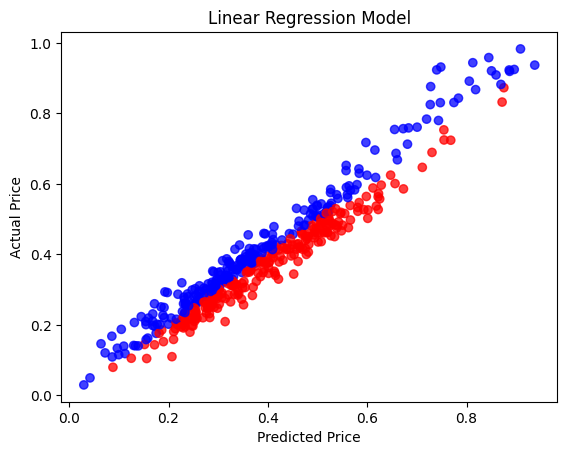

In [60]:
import numpy as np
y_pred = model_lr.predict(x_test)
color = np.where(y_pred[:, 0] > y_test['SALES_PRICE'], 'red', 'blue')
plt.scatter(y_pred,y_test,alpha=0.75,color=color)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()


**R2 Square Score**

In [61]:
from sklearn import metrics 
print('R2-SCORE:', metrics.r2_score(y_test,y_pred))

R2-SCORE: 0.9345010398269046


<h1>RandomForestRegressor Model</h1>

In [62]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)
kf = KFold(n_splits=10,shuffle=True)
cs = cross_val_score(RandomForestRegressor(n_estimators=10),input,output,cv=kf)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [63]:
cs.mean()

0.9597864442121203

In [64]:
start = time()
rr = RandomForestRegressor(n_estimators=10).fit(x_train,y_train)
end = time()
train_time_rf_reg = end - start
rf_pred = rr.predict(x_test)
rf_reg_score = rr.score(x_test,y_test)
rf_reg_score

/tmp/ipykernel_26/930106645.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rr = RandomForestRegressor(n_estimators=10).fit(x_train,y_train)


0.9565877844713006

<h1>XGBoost</h1>

In [65]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)
kf = KFold(n_splits=10,shuffle=True)
cs = cross_val_score(XGBRegressor(),x_train,y_train,cv=kf)

In [66]:
cs.mean()

0.9609011706826518

In [67]:
start = time()
xg = XGBRegressor().fit(x_train,y_train)
end = time()
train_time_xgb_reg = end - start
xgb_reg_pred = xg.predict(x_test)
xgb_score = xg.score(x_test,y_test)
xgb_score

0.9624662335066073

<h1>ExtraTreeRegressor</h1>

In [68]:
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size=0.2)
kf = KFold(n_splits=10,shuffle=True)
cs = cross_val_score(ExtraTreesRegressor(),x_train,y_train,cv=kf)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [69]:
cs.mean()

0.9619477571585813

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
start = time()
ext.fit(x_train,y_train)
end = time()
train_time_extrareg = end - start
extra_regressor = ext.score(x_test,y_test)
extra_regressor
# feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
# feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))


/tmp/ipykernel_26/3245329461.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ext.fit(x_train,y_train)


0.9650602349118168

In [71]:
models_cross = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest Regressor','XGBoost Regressor','Extra Regressor'],
    'Score': [reg_score,rf_reg_score,xgb_score,extra_regressor],
})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score
3,Extra Regressor,0.965060
2,XGBoost Regressor,0.962466
1,Random Forest Regressor,0.956588
0,Linear Regression,0.939016


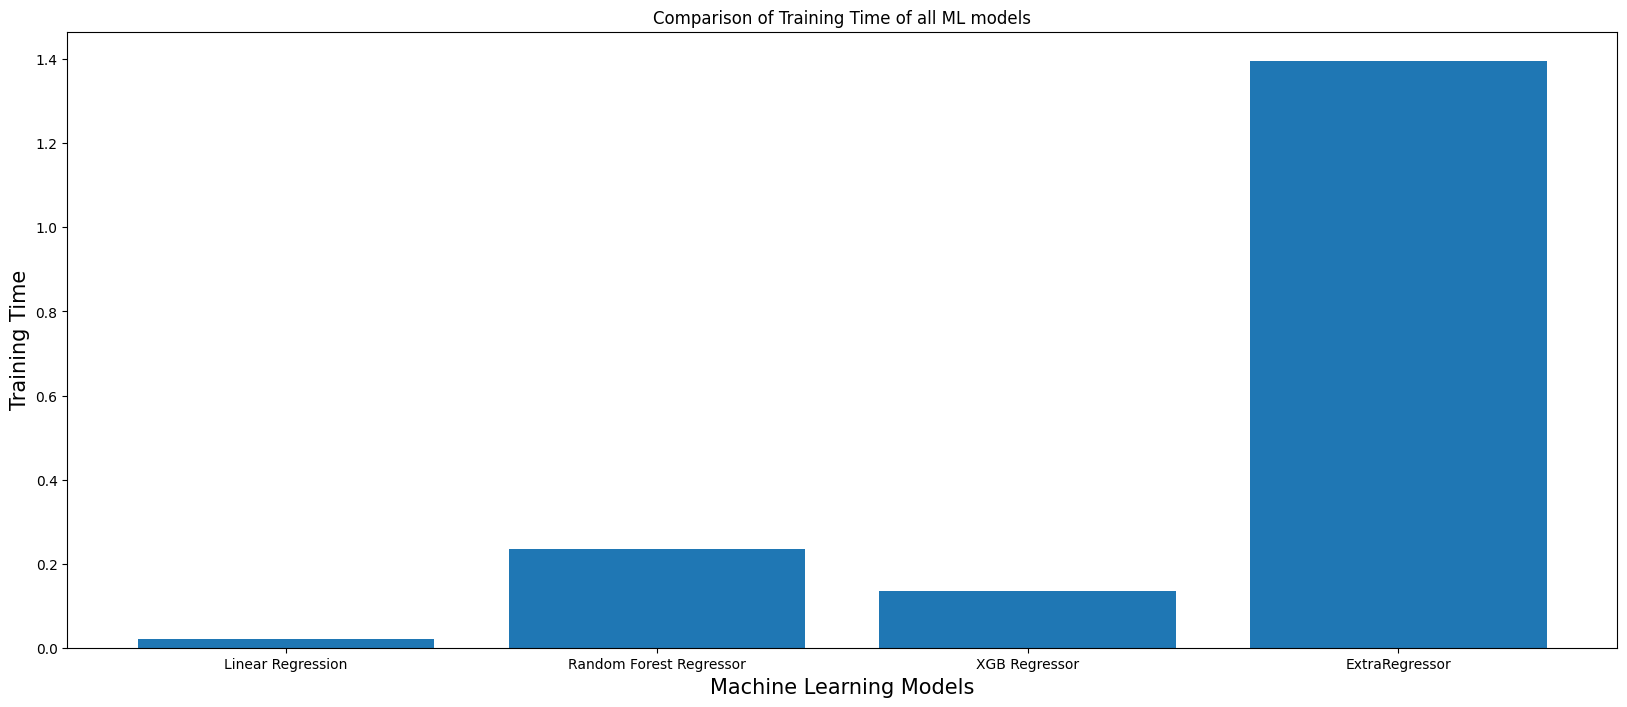

In [72]:
import numpy as np
model = ['Linear Regression','Random Forest Regressor', 'XGB Regressor','ExtraRegressor']
Train_Time = [
    train_time_linear_reg,
    train_time_rf_reg,
    train_time_xgb_reg,  
    train_time_extrareg
]
index = np.arange(len(model))
plt.figure(figsize=(20,8))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

<p> We see that the linear regression outperforms the other models in terms of training time.</p>
    
 <p> XGBoost Regressor seems to be the best choice to use, with minimal training time and better perfomance compared with other models.
    </p>

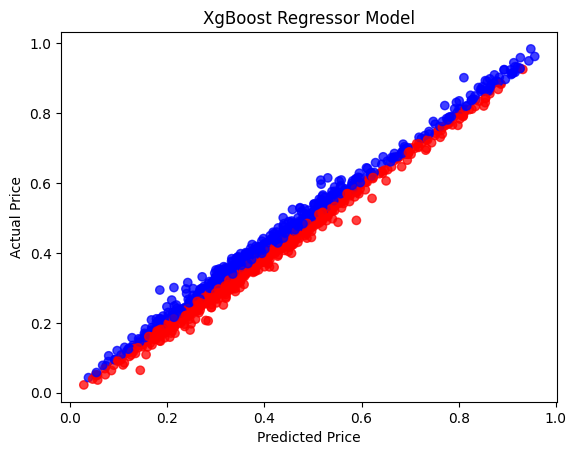

In [73]:
import numpy as np
y_pred = xg.predict(x_test)
color = np.where(y_pred > y_test['SALES_PRICE'], 'red', 'blue')
plt.scatter(y_pred,y_test,alpha=0.75,color=color)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XgBoost Regressor Model')
plt.show()


# Predictions

In [74]:
def prediction(area,sqft,buildtype,bedroom,bathroom,room,park,reg,commis,property_age):
    loc_index = np.where(input.columns == area)[0][0]
    buildtype_index = np.where(input.columns == buildtype)[0][0]
    x = np.zeros(len(input.columns))
    x[10] = sqft
    x[11] = bedroom
    x[12] = bathroom
    x[13] = room
    x[14] = park
    x[15] = reg
    x[16] = commis
    x[17] = property_age
    try:
        x[loc_index] = 1
    except:
        print("Enter Valid Area")
#     print(x)
        
    print("Predicted Sales Prices are: ",sales_price.inverse_transform([xg.predict([x])])[0][0])
        
    
prediction('T Nagar',1931,'Commercial',2,1,5,1,0.788189,0.75105,10)
prediction('Karapakkam',1004,'House',1,1,3,1,0.33845,0.284175,30)
    

Predicted Sales Prices are:  17024294.656446278
Predicted Sales Prices are:  8056721.998677552


<h1>Thank you!!!</h1>
<h1>Suggestions are Welcomed<h1>